In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress
import seaborn as sns

In [5]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data.transpose(0, 2, 1)
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data.transpose(0, 2, 1)
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [7]:
def divv(Vx, Vy, stepsize):
    dvx_dx = np.gradient(Vx, axis=0, edge_order = 2)/stepsize
    dvy_dy = np.gradient(Vy, axis=1, edge_order = 2)/stepsize

    DIV = dvx_dx + dvy_dy
    return DIV

def rotorr(Vx, Vy, stepsize):
    dvx_dy = np.gradient(Vx, axis=1, edge_order = 2)/stepsize
    dvy_dx = np.gradient(Vy, axis=0, edge_order = 2)/stepsize

    ROTOR = dvy_dx - dvx_dy
    return (ROTOR)

<h1>19. 06. 2025.</h1>
<p>
    We will calculate curl and divergence power. Firstly, we import, temporaly average and spatially convolve MURaM velocities.
    This is done for all $\tau$-s in range $\log\tau$ = {-1, -2, -3, -4}
</p>

In [8]:
Vxm1 = fits.open("Velocities_TAU_0_100.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_100.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm1 = Vxm1[::3,::2,::2]/1E5
Vym1 = Vym1[::3,::2,::2]/1E5
#Vxm2 = Vxm2.transpose(0, 2, 1)
#Vym2 = Vym2.transpose(0, 2, 1)

In [9]:
Vxm2 = fits.open("Velocities_TAU_0_010.fits")[1].data # Vy from Velocities.fits as originally thought
Vym2 = fits.open("Velocities_TAU_0_010.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm2 = Vxm2[::3,::2,::2]/1E5
Vym2 = Vym2[::3,::2,::2]/1E5
#Vxm2 = Vxm2.transpose(0, 2, 1)
#Vym2 = Vym2.transpose(0, 2, 1)

In [10]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [11]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 22.5/2, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 22.5/2, mode = "wrap")

In [12]:
Vxm1_filtered300 = gaussian_filter(Vxm1_mean, 11.25/2, mode = "wrap")
Vym1_filtered300 = gaussian_filter(Vym1_mean, 11.25/2, mode = "wrap")

In [13]:
Vxm2_mean = temporal_avg(Vxm2, 0, 90)
#Vxm2_mean = Vxm2_mean/1E5
Vym2_mean = temporal_avg(Vym2, 0, 90)
#Vym2_mean = Vym2_mean/1E5

In [14]:
Vxm2_filtered600 = gaussian_filter(Vxm2_mean, 22.5/2, mode = "wrap")
Vym2_filtered600 = gaussian_filter(Vym2_mean, 22.5/2, mode = "wrap")

In [15]:
Vxm2_filtered300 = gaussian_filter(Vxm2_mean, 11.25/2, mode = "wrap")
Vym2_filtered300 = gaussian_filter(Vym2_mean, 11.25/2, mode = "wrap")

In [16]:
Vxm3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm3 = Vxm3[::3,::2,::2]/1E5
Vym3 = Vym3[::3,::2,::2]/1E5
#Vxm3 = Vxm3.transpose(0, 2, 1)
#Vym3 = Vym3.transpose(0, 2, 1)

In [17]:
Vxm4 = fits.open("Velocities_TAU_0_0001.fits")[1].data # Vy from Velocities.fits as originally thought
Vym4 = fits.open("Velocities_TAU_0_0001.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm4 = Vxm4[::3,::2,::2]/1E5
Vym4 = Vym4[::3,::2,::2]/1E5
#Vxm4 = Vxm4.transpose(0, 2, 1)
#Vym4 = Vym4.transpose(0, 2, 1)

In [18]:
Vxm3_mean = temporal_avg(Vxm3, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym3_mean = temporal_avg(Vym3, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [19]:
Vxm4_mean = temporal_avg(Vxm4, 0, 90)
#Vxm1_mean = Vxm1_mean/1E5
Vym4_mean = temporal_avg(Vym4, 0, 90)
#Vym1_mean = Vym1_mean/1E5

In [20]:
Vxm3_filtered600 = gaussian_filter(Vxm3_mean, 22.5/2, mode = "wrap")
Vym3_filtered600 = gaussian_filter(Vym3_mean, 22.5/2, mode = "wrap")

In [21]:
Vxm3_filtered300 = gaussian_filter(Vxm3_mean, 11.25/2, mode = "wrap")
Vym3_filtered300 = gaussian_filter(Vym3_mean, 11.25/2, mode = "wrap")

In [22]:
Vxm4_filtered600 = gaussian_filter(Vxm4_mean, 22.5/2, mode = "wrap")
Vym4_filtered600 = gaussian_filter(Vym4_mean, 22.5/2, mode = "wrap")

In [23]:
Vxm4_filtered300 = gaussian_filter(Vxm4_mean, 11.25/2, mode = "wrap")
Vym4_filtered300 = gaussian_filter(Vym4_mean, 11.25/2, mode = "wrap")

<h3>FLCT-inferred velocities</h3>
<p>
    Now we import and temporaly average velocities FLCT recovered using $B_z$ inferred from Fe I line
    using pyMilne (Milne-Eddington approximation) and $B_z$ inferred from Mg I b2 using weak-field approximation.
</p>

In [24]:
Vx_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME_FeI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")[1].data.transpose(0, 2, 1)

In [25]:
Vx_BzFeI_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_FeI_tracked.fits")

In [26]:
Vx_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME3_FeI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")[1].data.transpose(0, 2, 1)

In [27]:
Vx_BzFeI_cor3 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")
Vy_BzFeI_cor3 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_FeI_tracked.fits")

In [28]:
Vx_ME_MgI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME_MgI = fits.open("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")[1].data.transpose(0, 2, 1)

In [29]:
Vx_BzMgI_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")
Vy_BzMgI_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_30_Bz_WFA_Mg_tracked.fits")

In [30]:
Vx_ME3_MgI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_ME3_MgI = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")[1].data.transpose(0, 2, 1)

In [31]:
Vx_BzMgI_cor3 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")
Vy_BzMgI_cor3 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_Bz_WFA_Mg_tracked.fits")

<h3>Power calculation (average)</h3>
<p>
    Let's calculate power according to this definition: sum(|div(v)|^2)/area and sum(|curl(v)|^2)/area
</p>

In [32]:
# Power of divergence ------------------> sum(|div(v)|^2)/area

# logtau = -1, OTC 600 km

div_m1_SIM = divv(Vxm1_filtered600, Vym1_filtered600, 32)
power_div_m1_SIM = np.sum(np.abs(div_m1_SIM)**2)/(768*768*16)
print("Converging/diverging motions power:{}".format(power_div_m1_SIM))

# Power of curl ------------------> sum(|curl(v)|^2)/area

curl_m1_SIM = rotorr(Vxm1_filtered600, Vym1_filtered600, 32)
power_curl_m1_SIM = np.sum(np.abs(curl_m1_SIM)**2)/(768*768*16)
print("Curl power:{}".format(power_curl_m1_SIM))

print("Their difference (Curl - Divergence power): {}".format(power_curl_m1_SIM-power_div_m1_SIM))

Converging/diverging motions power:2.6199103331236984e-07
Curl power:1.6990147955198154e-08
Their difference (Curl - Divergence power): -2.450008764753875e-07


In [33]:
# Power of divergence ------------------> sum(|div(v)|^2)/area

# Fe I line

div_FeI = divv(Vx_BzFeI_cor, Vy_BzFeI_cor, 32)
power_div_FeI = np.sum(np.abs(div_FeI)**2)/(768*768*16)
print("Converging/diverging motions power:{}".format(power_div_FeI))

# Power of curl ------------------> sum(|curl(v)|^2)/area

curl_FeI = rotorr(Vx_BzFeI_cor, Vy_BzFeI_cor, 32)
power_curl_FeI = np.sum(np.abs(curl_FeI)**2)/(768*768*16)
print("Curl power:{}".format(power_curl_FeI))

print("Their difference (Curl - Divergence power): {}".format(power_curl_FeI-power_div_FeI))

Converging/diverging motions power:1.259987152939156e-06
Curl power:8.444563596812859e-07
Their difference (Curl - Divergence power): -4.1553079325787016e-07


In [34]:
# Let's see what is the ratio of curl power to div power
# For example, if the simulations have average curl power 1.3 times average div power, then reconstructions should, too.

print("MURaM ratio (Curl / Divergence power): {}".format(power_curl_m1_SIM/power_div_m1_SIM))
print("--------------------------------------------------")
print("FLCT-recovered ratio (Curl / Divergence power): {}".format(power_curl_FeI/power_div_FeI))

MURaM ratio (Curl / Divergence power): 0.06485011428594589
--------------------------------------------------
FLCT-recovered ratio (Curl / Divergence power): 0.6702102935823062


<h3>
    Okay, about order of magnitude off for $\log\tau = -1$ velocity vs. FLCT Fe I velocity. Next, we check the same for
    $\log\tau = -3$ velocity vs. Mg I b2 case.
</h3>

In [35]:
# Power of divergence ------------------> sum(|div(v)|^2)/area

# logtau = -3, OTC 600 km

div_m3_SIM = divv(Vxm3_filtered600, Vym3_filtered600, 32)
power_div_m3_SIM = np.sum(np.abs(div_m3_SIM)**2)/(768*768*16)
print("Converging/diverging motions power:{}".format(power_div_m3_SIM))

# Power of curl ------------------> sum(|curl(v)|^2)/area

curl_m3_SIM = rotorr(Vxm3_filtered600, Vym3_filtered600, 32)
power_curl_m3_SIM = np.sum(np.abs(curl_m3_SIM)**2)/(768*768*16)
print("Curl power:{}".format(power_curl_m3_SIM))

print("Their difference (Curl - Divergence power): {}".format(power_curl_m3_SIM-power_div_m3_SIM))

Converging/diverging motions power:2.987172464941068e-08
Curl power:1.139084915280364e-08
Their difference (Curl - Divergence power): -1.848087549660704e-08


In [36]:
# Power of divergence ------------------> sum(|div(v)|^2)/area

# Mg I b2 line

div_MgI = divv(Vx_BzMgI_cor, Vy_BzMgI_cor, 32)
power_div_MgI = np.sum(np.abs(div_MgI)**2)/(768*768*16)
print("Converging/diverging motions power:{}".format(power_div_MgI))

# Power of curl ------------------> sum(|curl(v)|^2)/area

curl_MgI = rotorr(Vx_BzMgI_cor, Vy_BzMgI_cor, 32)
power_curl_MgI = np.sum(np.abs(curl_MgI)**2)/(768*768*16)
print("Curl power:{}".format(power_curl_MgI))

print("Their difference (Curl - Divergence power): {}".format(power_curl_MgI-power_div_MgI))

Converging/diverging motions power:2.9697448835621136e-07
Curl power:2.336990482661272e-07
Their difference (Curl - Divergence power): -6.327544009008415e-08


In [37]:
print("MURaM ratio (Curl / Divergence power): {}".format(power_curl_m3_SIM/power_div_m3_SIM))
print("--------------------------------------------------")
print("FLCT-recovered ratio (Curl / Divergence power): {}".format(power_curl_MgI/power_div_MgI))

MURaM ratio (Curl / Divergence power): 0.38132545351982117
--------------------------------------------------
FLCT-recovered ratio (Curl / Divergence power): 0.7869330781902475


<h3 style="color:orange">These ratios are at least the same order of magnitude, but we would like complete match. Our tracking method should be able to reconstruct this ratio.
</h3>

<h2>What if we smooth FLCT maps???</h2>

In [38]:
Smoothed_FLCT_Fe_600x = gaussian_filter(Vx_BzFeI_cor, sigma = 22.5/2, mode = "wrap")
Smoothed_FLCT_Fe_600y = gaussian_filter(Vy_BzFeI_cor, sigma = 22.5/2, mode = "wrap")
Smoothed_FLCT_Fe_300x = gaussian_filter(Vx_BzFeI_cor3, sigma = 11.25/2, mode = "wrap")
Smoothed_FLCT_Fe_300y = gaussian_filter(Vy_BzFeI_cor3, sigma = 11.25/2, mode = "wrap")

sm_div_Fe_600 = divv(Smoothed_FLCT_Fe_600x, Smoothed_FLCT_Fe_600y, 32)
sm_div_Fe_300 = divv(Smoothed_FLCT_Fe_300x, Smoothed_FLCT_Fe_300y, 32)

sm_curl_Fe_600 = rotorr(Smoothed_FLCT_Fe_600x, Smoothed_FLCT_Fe_600y, 32)
sm_curl_Fe_300 = rotorr(Smoothed_FLCT_Fe_300x, Smoothed_FLCT_Fe_300y, 32)

In [39]:
import math
import scipy.signal

def nonlinearDiffusionFilter(image: np.ndarray,
                             iterations = 10,
                             lamb = 1.0,
                             tau = 0.200, # 0.125
                             image_seq = None):
    """
        Execute nonlinear, isotropic, smoothing filter on image.
        The method is described in the 1990 paper by Perona and Malik.
        This smoothing method uses diffusion that preserves edges.
    """

    def computeUpdate(u: np.ndarray, g: np.ndarray):
        """
            Compute the update for the next iteration using the spatial
            derivatives.
        """
        update = np.zeros(u.shape, dtype=float)
        u = np.pad(u, pad_width=1, mode='constant')
        g = np.pad(g, pad_width=1, mode='constant')

        for i in range(1, u.shape[1]-1):
            for j in range(1, u.shape[0]-1):

                g_pj = math.sqrt(g[j, i+1] * g[j, i])
                g_nj = math.sqrt(g[j, i-1] * g[j, i])
                g_ip = math.sqrt(g[j+1, i] * g[j, i])
                g_in = math.sqrt(g[j-1, 1] * g[j, i])

                if i==u.shape[1]-2:
                    g_pj = 0
                if i==1:
                    g_nj = 0
                if j==u.shape[0]-2:
                    g_ip = 0
                if j==1:
                    g_in = 0

                ux0 =   g_pj * (u[j, i+1] - u[j, i])
                ux1 = - g_nj * (u[j, i]   - u[j, i-1])
                uy0 =   g_ip * (u[j+1, i] - u[j, i])
                uy1 = - g_in * (u[j, i]   - u[j-1, i])

                # update is not padded so need to subtract 1 from i an j
                update[j-1,i-1] = ux0 + ux1 + uy0 + uy1
        return update

    def computeDiffusivity(u: np.ndarray, lamb: float):
        """
            Compute the nonlinear, gradient derived, diffusivity.
        """
        shape = u.shape
        if len(shape) > 2 and shape[2] > 1:
            print("RGB to gray")
            u = skimage.color.rgb2gray(u)
        gradkernelx = 0.5 * np.array([[ 0.0, 0.0, 0.0],
                                      [-1.0, 0.0, 1.0],
                                      [ 0.0, 0.0, 0.0]])
        gradkernely = 0.5 * np.array([[ 0.0,-1.0, 0.0],
                                      [ 0.0, 0.0, 0.0],
                                      [ 0.0, 1.0, 0.0]])
        gradx  = scipy.signal.convolve2d(u, gradkernelx, boundary='symm')
        grady  = scipy.signal.convolve2d(u, gradkernely, boundary='symm')
        gradm2 = np.power(gradx, 2) + np.power(grady, 2)
        g = 1.0 / np.sqrt(1.0 + gradm2 / (lamb*lamb))
        return g

    u = np.copy(image)
    if len(u.shape) > 2 and u.shape[2] == 1:
        u = np.reshape(u, (u.shape[0], u.shape[1]))
    if image_seq != None:
        image_seq.append(np.copy(u))

    for i in range(iterations):
        print(f"Iteration: {i+1}/{iterations}")
        g = computeDiffusivity(u, lamb)
        update = computeUpdate(u, g)
        u = u + tau * update
        if image_seq != None:
            image_seq.append(np.copy(u))
    return u

In [40]:
nl_div_FeI = nonlinearDiffusionFilter(div_FeI)
div_m1_SIM300 = divv(Vxm1_filtered300, Vym1_filtered300, 32)
nl_div_MgI = nonlinearDiffusionFilter(div_MgI)
div_m3_SIM300 = divv(Vxm3_filtered300, Vym3_filtered300, 32)
nl_curl_FeI = nonlinearDiffusionFilter(curl_FeI)
nl_curl_MgI = nonlinearDiffusionFilter(curl_MgI)

Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10


In [41]:
# Filter the smoothed
nl_smooth_div_FeI = nonlinearDiffusionFilter(sm_div_Fe_600)

# Smooth the filtered
smooth_nl_div_FeI = gaussian_filter(nl_div_FeI, sigma = 22.5/2, mode = "wrap")

Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10


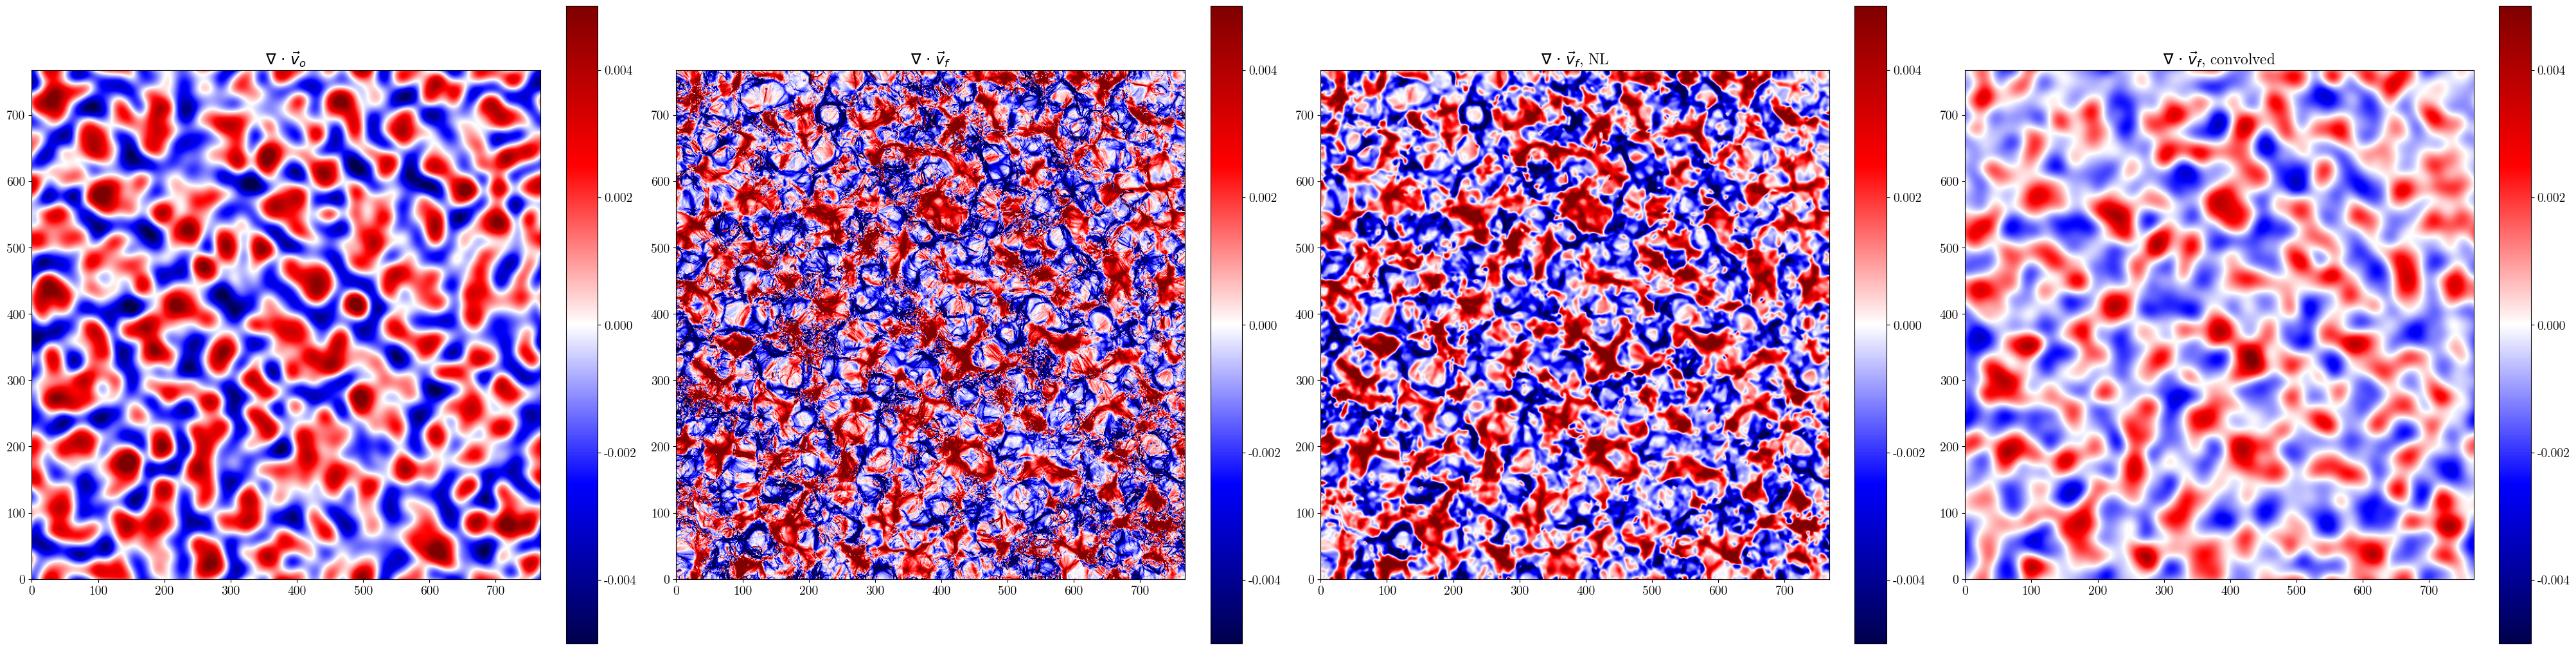

In [42]:
## Compare divergence of ground-truth flow and divergence of smoothed FLCT flow

fig = plt.figure(constrained_layout = True, figsize = (40,10))
plt.subplot(141)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_o$")
plt.imshow(div_m1_SIM.T, origin = "lower", cmap = "seismic", vmin = -0.005, vmax = 0.005)
plt.colorbar()
plt.subplot(142)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_f$")
plt.imshow(div_FeI.T, origin = "lower", cmap = "seismic", vmin = -0.005, vmax = 0.005)
plt.colorbar()
plt.subplot(143)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_f$, NL")
plt.imshow(nl_div_FeI.T, origin = "lower", cmap = "seismic", vmin = -0.005, vmax = 0.005)
plt.colorbar()
plt.subplot(144)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_f$, convolved")
plt.imshow(sm_div_Fe_600.T, origin = "lower", cmap = "seismic", vmin = -0.005,  vmax = 0.005)
plt.colorbar()

In [43]:
## What is the correlation?

# Pearson's coefficient for ground-truth vs. unfiltered, non-smoothed FLCT
R_basic = pearsonr(div_m1_SIM.flatten(), div_FeI.flatten())
print("Pearson's coeff. for basic case is: {}".format(R_basic))
print("--------------------------------------")

#Pearons's coefficient for ground-truth vs filtered, non-smoothed FLCT
R_fil_non = pearsonr(div_m1_SIM.flatten(), nl_div_FeI.flatten())
print("Pearson's coeff. for filtered, non-smoothed case is: {}".format(R_fil_non))
print("--------------------------------------")

#Pearons's coefficient for ground-truth vs non-filtered, smoothed FLCT
R_non_smooth = pearsonr(div_m1_SIM.flatten(), sm_div_Fe_600.flatten())
print("Pearson's coeff. for unfiltered, smoothed case is: {}".format(R_non_smooth))
print("--------------------------------------")


#Pearons's coefficient for ground-truth vs filtered smoothed FLCT
R_fil_smooth = pearsonr(div_m1_SIM.flatten(), nl_smooth_div_FeI.flatten())
print("Pearson's coeff. for filtered smoothed order case is: {}".format(R_fil_smooth))
print("--------------------------------------")

#Pearons's coefficient for ground-truth vs smoothed filtered FLCT
R_smooth_nl = pearsonr(div_m1_SIM.flatten(), smooth_nl_div_FeI.flatten())
print("Pearson's coeff. for smoothed filtered order case is: {}".format(R_smooth_nl))
print("--------------------------------------")

Pearson's coeff. for basic case is: PearsonRResult(statistic=np.float64(0.2940575352164799), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for filtered, non-smoothed case is: PearsonRResult(statistic=np.float64(0.4895006419037001), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for unfiltered, smoothed case is: PearsonRResult(statistic=np.float64(0.6568462974047908), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for filtered smoothed order case is: PearsonRResult(statistic=np.float64(0.6571689338242515), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for smoothed filtered order case is: PearsonRResult(statistic=np.float64(0.6547092440239561), pvalue=np.float64(0.0))
--------------------------------------


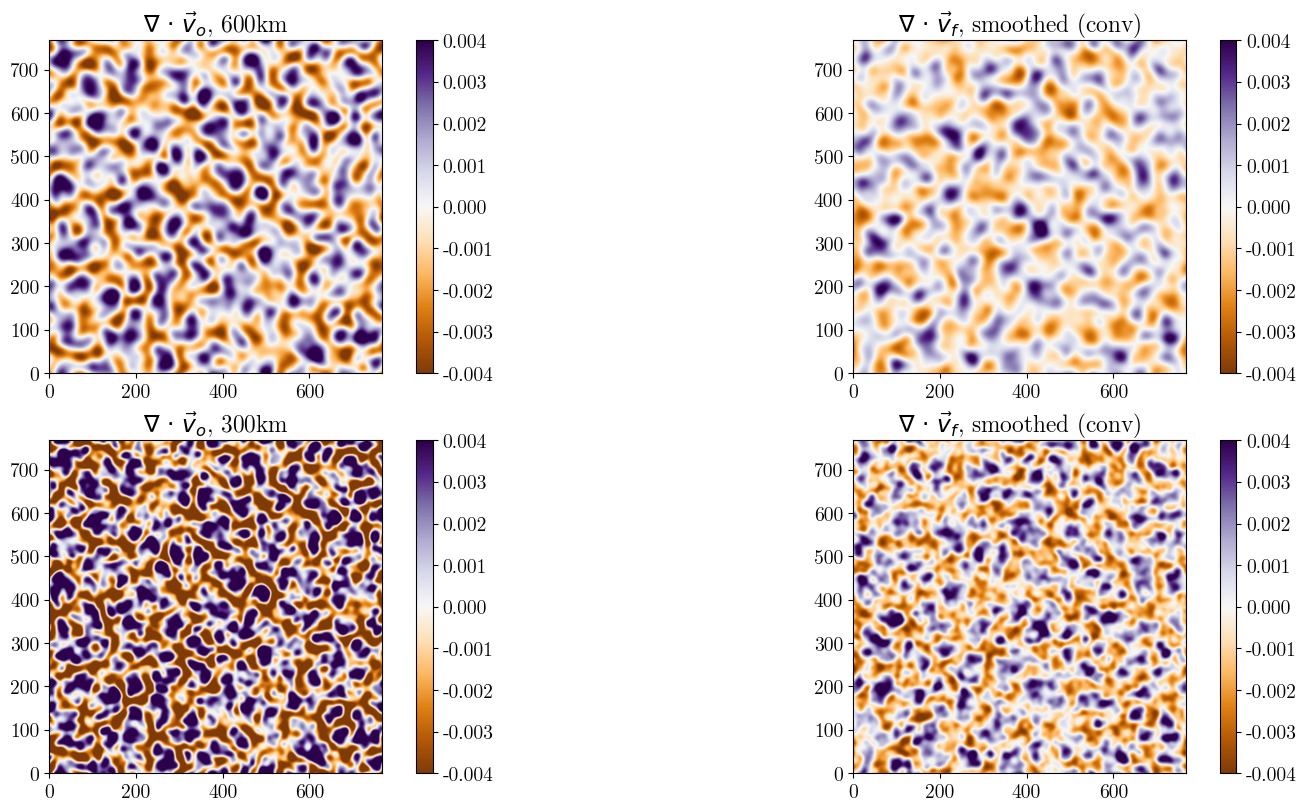

In [44]:
# On the left: ground-truth (MURaM) divergence
# On the right: Divergence of smoothed FLCT velocity

fig = plt.figure(constrained_layout = True, figsize = (16, 8))
plt.subplot(221)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_o$, 600km")
plt.imshow(div_m1_SIM.T, origin = "lower", cmap = "PuOr", vmin = -0.004, vmax = 0.004)
plt.colorbar()
plt.subplot(222)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_f$, smoothed (conv)")
plt.imshow(sm_div_Fe_600.T, origin = "lower", cmap = "PuOr", vmin = -0.004, vmax = 0.004)
plt.colorbar()

plt.subplot(223)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_o$, 300km")
plt.imshow(div_m1_SIM300.T, origin = "lower", cmap = "PuOr", vmin = -0.004, vmax = 0.004)
plt.colorbar()
plt.subplot(224)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_f$, smoothed (conv)")
plt.imshow(sm_div_Fe_300.T, origin = "lower", cmap = "PuOr", vmin = -0.004, vmax = 0.004)
plt.colorbar()

<h2>For the Mg I b2 line</h2>

In [45]:
Smoothed_FLCT_Mg_600x = gaussian_filter(Vx_BzMgI_cor, sigma = 22.5/2, mode = "wrap")
Smoothed_FLCT_Mg_600y = gaussian_filter(Vy_BzMgI_cor, sigma = 22.5/2, mode = "wrap")
Smoothed_FLCT_Mg_300x = gaussian_filter(Vx_BzMgI_cor3, sigma = 11.25/2, mode = "wrap")
Smoothed_FLCT_Mg_300y = gaussian_filter(Vy_BzMgI_cor3, sigma = 11.25/2, mode = "wrap")

sm_div_Mg_600 = divv(Smoothed_FLCT_Mg_600x, Smoothed_FLCT_Mg_600y, 32)
sm_div_Mg_300 = divv(Smoothed_FLCT_Mg_300x, Smoothed_FLCT_Mg_300y, 32)

sm_curl_Mg_600 = rotorr(Smoothed_FLCT_Mg_600x, Smoothed_FLCT_Mg_600y, 32)
sm_curl_Mg_300 = rotorr(Smoothed_FLCT_Mg_300x, Smoothed_FLCT_Mg_300y, 32)

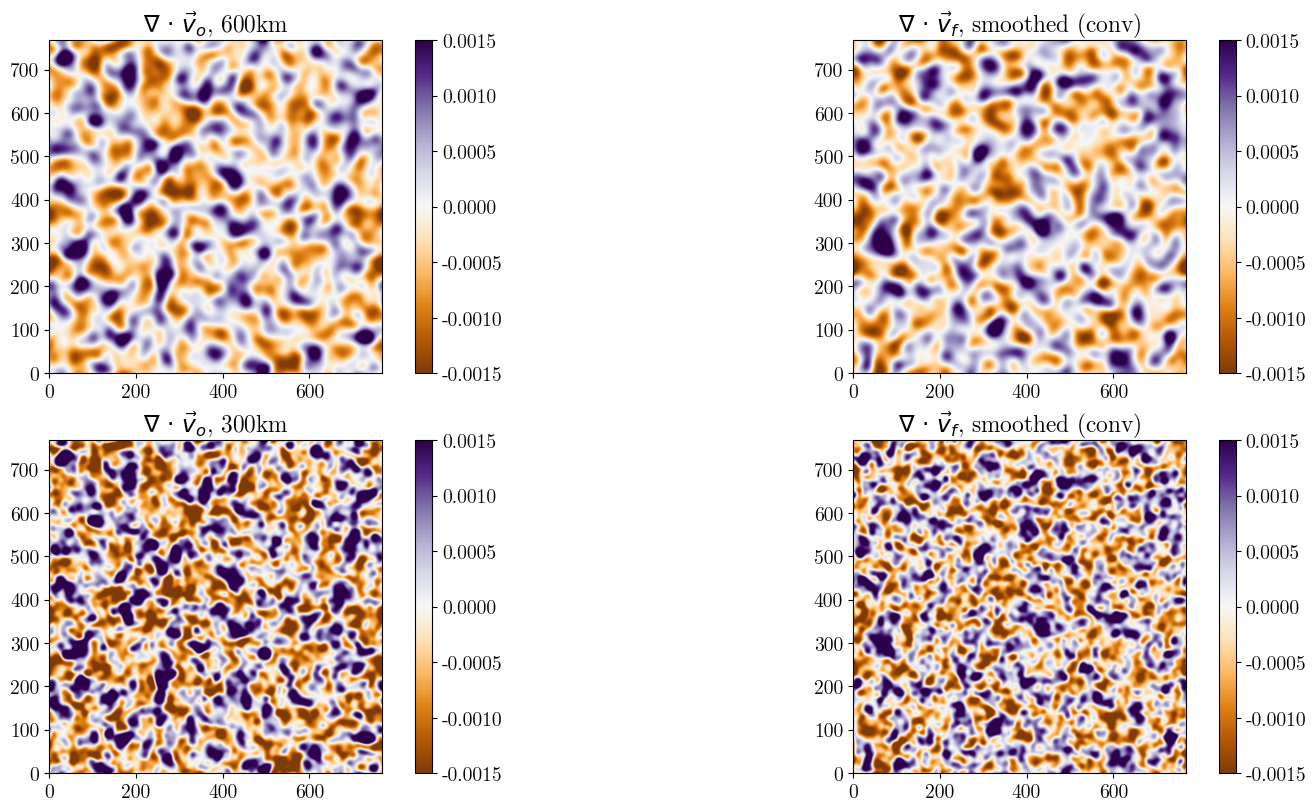

In [46]:
# On the left: ground-truth (MURaM) divergence
# On the right: Divergence of smoothed FLCT velocity

fig = plt.figure(constrained_layout = True, figsize = (16, 8))
plt.subplot(221)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_o$, 600km")
plt.imshow(div_m3_SIM.T, origin = "lower", cmap = "PuOr", vmin = -0.0015, vmax = 0.0015)
plt.colorbar()
plt.subplot(222)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_f$, smoothed (conv)")
plt.imshow(sm_div_Mg_600.T, origin = "lower", cmap = "PuOr", vmin = -0.0015, vmax = 0.0015)
plt.colorbar()

plt.subplot(223)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_o$, 300km")
plt.imshow(div_m3_SIM300.T, origin = "lower", cmap = "PuOr", vmin = -0.0015, vmax = 0.0015)
plt.colorbar()
plt.subplot(224)
plt.title("$\\nabla$ $\cdot$ $\\vec{v}_f$, smoothed (conv)")
plt.imshow(sm_div_Mg_300.T, origin = "lower", cmap = "PuOr", vmin = -0.0015, vmax = 0.0015)
plt.colorbar()

In [47]:
# Filter the smoothed
nl_smooth_div_MgI = nonlinearDiffusionFilter(sm_div_Mg_600)

# Smooth the filtered
smooth_nl_div_MgI = gaussian_filter(nl_div_MgI, sigma = 22.5/2, mode = "wrap")

Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10


In [48]:
## What is the correlation?

# Pearson's coefficient for ground-truth vs. unfiltered, non-smoothed FLCT
RM_basic = pearsonr(div_m3_SIM.flatten(), div_MgI.flatten())
print("Pearson's coeff. for basic case is: {}".format(RM_basic))
print("--------------------------------------")

#Pearons's coefficient for ground-truth vs filtered, non-smoothed FLCT
RM_fil_non = pearsonr(div_m3_SIM.flatten(), nl_div_MgI.flatten())
print("Pearson's coeff. for filtered, non-smoothed case is: {}".format(RM_fil_non))
print("--------------------------------------")

#Pearons's coefficient for ground-truth vs non-filtered, smoothed FLCT
RM_non_smooth = pearsonr(div_m3_SIM.flatten(), sm_div_Mg_600.flatten())
print("Pearson's coeff. for unfiltered, smoothed case is: {}".format(RM_non_smooth))
print("--------------------------------------")


#Pearons's coefficient for ground-truth vs filtered smoothed FLCT
RM_fil_smooth = pearsonr(div_m3_SIM.flatten(), nl_smooth_div_MgI.flatten())
print("Pearson's coeff. for filtered smoothed order case is: {}".format(RM_fil_smooth))
print("--------------------------------------")

#Pearons's coefficient for ground-truth vs smoothed filtered FLCT
RM_smooth_nl = pearsonr(div_m3_SIM.flatten(), smooth_nl_div_MgI.flatten())
print("Pearson's coeff. for smoothed filtered order case is: {}".format(RM_smooth_nl))
print("--------------------------------------")

Pearson's coeff. for basic case is: PearsonRResult(statistic=np.float64(0.22886179335933673), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for filtered, non-smoothed case is: PearsonRResult(statistic=np.float64(0.3566770976009091), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for unfiltered, smoothed case is: PearsonRResult(statistic=np.float64(0.5269107397513779), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for filtered smoothed order case is: PearsonRResult(statistic=np.float64(0.5280355616782756), pvalue=np.float64(0.0))
--------------------------------------
Pearson's coeff. for smoothed filtered order case is: PearsonRResult(statistic=np.float64(0.5242699765462208), pvalue=np.float64(0.0))
--------------------------------------
